Tour óptimo encontrado: [110, 125, 53, 61, 149, 35, 114, 127, 111, 121, 141, 137, 48, 144, 58, 37, 143, 102, 92, 75, 38, 82, 115, 133, 119, 27, 11, 117, 109, 18, 107, 113, 136, 98, 80, 112, 91, 95, 30, 76, 93, 5, 40, 116, 26, 129, 65, 52, 49, 7, 15, 142, 51, 99, 13, 146, 108, 41, 1, 128, 139, 131, 25, 28, 12, 10, 46, 17, 0, 33, 83, 104, 89, 31, 64, 78, 97, 87, 3, 20, 59, 67, 122, 60, 101, 134, 56, 36, 66, 50, 39, 68, 135, 103, 118, 42, 96, 9, 54, 140, 106, 62, 57, 32, 23, 8, 138, 69, 85, 4, 145, 19, 73, 2, 70, 84, 47, 72, 29, 124, 148, 21, 86, 14, 130, 147, 63, 22, 77, 126, 100, 123, 34, 6, 94, 88, 74, 120, 24, 45, 43, 105, 71, 44, 90, 16, 79, 81, 132, 55]
Distancia total del tour: 39263.584076950385


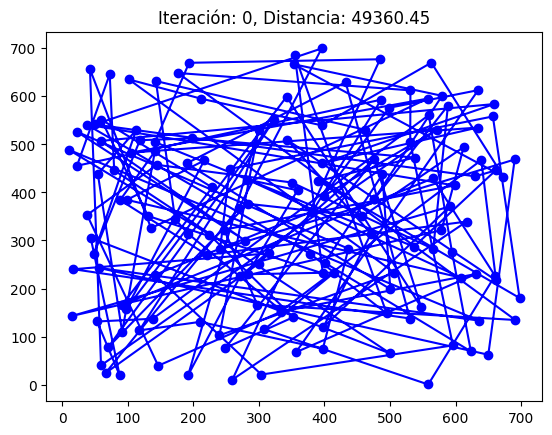

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Leer datos de coordenadas del archivo TSP
def read_tsp_file(filename):
    coordinates = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 3 and parts[0].isdigit():
                coordinates.append((float(parts[1]), float(parts[2])))
    return np.array(coordinates)

# Calcular la distancia total de un tour
def calculate_total_distance(tour, distances):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distances[tour[i], tour[i + 1]]
    total_distance += distances[tour[-1], tour[0]]  # Regresar al punto de inicio
    return total_distance

# Crear una población inicial de tours
def initialize_population(pop_size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(pop_size)]

# Función de fitness para evaluar un tour
def fitness(tour, distances):
    return 1 / calculate_total_distance(tour, distances)

# Selección de individuos para la próxima generación
def selection(population, distances, s):
    population = sorted(population, key=lambda tour: fitness(tour, distances), reverse=True)
    return population[:int(s * len(population))]

# Operador de cruce para combinar dos tours
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child_p1 = parent1[start:end + 1]
    child_p2 = [city for city in parent2 if city not in child_p1]
    return child_p1 + child_p2

# Operador de mutación para alterar un tour
def mutate(tour, mutation_rate):
    for i in range(len(tour)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(tour) - 1)
            tour[i], tour[j] = tour[j], tour[i]
    return tour

# Algoritmo genético para el TSP
def genetic_algorithm_tsp(coordinates, pop_size=100, s=0.5, c=0.8, m=0.1, maxI=500):
    num_cities = len(coordinates)
    distances = distance.cdist(coordinates, coordinates, 'euclidean')

    # Inicialización de la población
    population = initialize_population(pop_size, num_cities)
    best_tour = None
    best_distance = float('inf')

    # Almacenar datos para la animación
    animation_data = []

    # Iteraciones del algoritmo genético
    for iteration in range(maxI):
        # Evaluación y selección
        population = selection(population, distances, s)

        # Cruce
        new_population = []
        while len(new_population) < pop_size * c:
            parent1, parent2 = random.sample(population, 2)
            child = crossover(parent1, parent2)
            new_population.append(child)

        # Mutación
        population += [mutate(individual, m) for individual in new_population]

        # Rellenar la población si es necesario
        while len(population) < pop_size:
            population.append(random.sample(range(num_cities), num_cities))

        # Evaluar la mejor solución de la generación
        current_best = min(population, key=lambda tour: calculate_total_distance(tour, distances))
        current_distance = calculate_total_distance(current_best, distances)
        if current_distance < best_distance:
            best_tour, best_distance = current_best, current_distance

        # Almacenar datos para la animación
        animation_data.append((iteration, current_best.copy(), best_distance))

    return best_tour, best_distance, animation_data

# Animación de los resultados
def animate_tsp(animation_data, coordinates):
    fig, ax = plt.subplots()
    for iteration, tour, distance in animation_data:
        ax.clear()
        tour_coords = coordinates[tour + [tour[0]]]
        ax.plot(tour_coords[:, 0], tour_coords[:, 1], 'bo-')
        ax.set_title(f'Iteración: {iteration}, Distancia: {distance:.2f}')
        plt.pause(0.1)
    plt.show()

if __name__ == "__main__":
    # Leer datos del problema
    coordinates = read_tsp_file('ch150.tsp')

    # Ejecutar el algoritmo genético
    best_tour, best_distance, animation_data = genetic_algorithm_tsp(coordinates)

    # Mostrar los resultados
    print("Tour óptimo encontrado:", best_tour)
    print("Distancia total del tour:", best_distance)

    # Animar el proceso de optimización
    animate_tsp(animation_data, coordinates)


Tour óptimo encontrado: [89, 57, 41, 27, 8, 50, 46, 68, 10, 147, 59, 65, 117, 69, 18, 36, 5, 39, 60, 35, 100, 143, 31, 37, 115, 79, 121, 71, 48, 144, 122, 116, 139, 11, 52, 72, 62, 2, 114, 105, 44, 70, 25, 55, 109, 108, 91, 130, 22, 56, 1, 28, 80, 136, 98, 119, 26, 40, 38, 58, 51, 45, 82, 131, 64, 32, 92, 6, 4, 84, 140, 24, 146, 73, 12, 90, 67, 118, 148, 61, 0, 47, 20, 3, 103, 13, 149, 30, 135, 111, 124, 106, 94, 81, 142, 123, 125, 83, 75, 120, 76, 15, 132, 104, 7, 74, 17, 66, 42, 87, 93, 133, 54, 141, 145, 85, 134, 107, 113, 101, 49, 19, 138, 23, 77, 63, 43, 53, 96, 97, 102, 99, 86, 33, 127, 21, 110, 29, 78, 126, 16, 129, 128, 88, 34, 95, 112, 9, 14, 137]
Distancia total del tour: 22618.661168084323


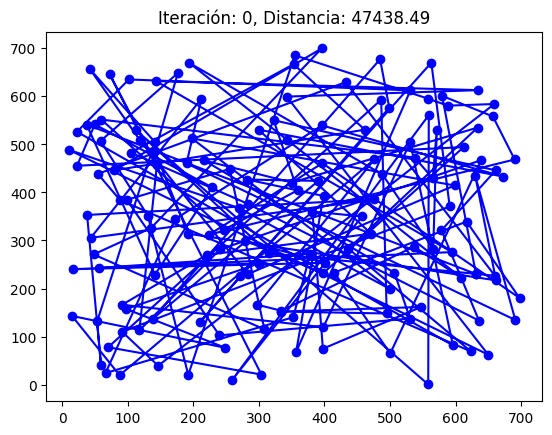

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Leer datos de coordenadas del archivo TSP
def read_tsp_file(filename):
    coordinates = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 3 and parts[0].isdigit():
                coordinates.append((float(parts[1]), float(parts[2])))
    return np.array(coordinates)

# Calcular la distancia total de un tour
def calculate_total_distance(tour, distances):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distances[tour[i], tour[i + 1]]
    total_distance += distances[tour[-1], tour[0]]  # Regresar al punto de inicio
    return total_distance

# Crear una población inicial de tours
def initialize_population(pop_size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(pop_size)]

# Función de fitness para evaluar un tour
def fitness(tour, distances):
    return 1 / calculate_total_distance(tour, distances)

# Selección de individuos para la próxima generación (Selección por Torneo)
def selection(population, distances, tournament_size=5):
    selected = []
    for _ in range(len(population) // 2):
        tournament = random.sample(population, tournament_size)
        winner = max(tournament, key=lambda tour: fitness(tour, distances))
        selected.append(winner)
    return selected

# Operador de cruce para combinar dos tours (Order Crossover, OX)
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size
    child[start:end + 1] = parent1[start:end + 1]
    pointer = 0
    for city in parent2:
        if city not in child:
            while child[pointer] != -1:
                pointer += 1
            child[pointer] = city
    return child

# Operador de mutación para alterar un tour (Intercambio de dos ciudades)
def mutate(tour, mutation_rate):
    for i in range(len(tour)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(tour) - 1)
            tour[i], tour[j] = tour[j], tour[i]
    return tour

# Algoritmo genético para el TSP (con elitismo)
def genetic_algorithm_tsp(coordinates, pop_size=200, s=0.5, c=0.9, m=0.05, maxI=1000):
    num_cities = len(coordinates)
    distances = distance.cdist(coordinates, coordinates, 'euclidean')

    # Inicialización de la población
    population = initialize_population(pop_size, num_cities)
    best_tour = None
    best_distance = float('inf')

    # Almacenar datos para la animación
    animation_data = []

    # Iteraciones del algoritmo genético
    for iteration in range(maxI):
        # Evaluación y selección
        population = selection(population, distances)

        # Cruce
        new_population = []
        while len(new_population) < pop_size * c:
            parent1, parent2 = random.sample(population, 2)
            child = crossover(parent1, parent2)
            new_population.append(child)

        # Mutación
        population += [mutate(individual, m) for individual in new_population]

        # Elitismo: preservar el mejor individuo
        if best_tour is not None:
            population.append(best_tour)

        # Rellenar la población si es necesario
        while len(population) < pop_size:
            population.append(random.sample(range(num_cities), num_cities))

        # Evaluar la mejor solución de la generación
        current_best = min(population, key=lambda tour: calculate_total_distance(tour, distances))
        current_distance = calculate_total_distance(current_best, distances)
        if current_distance < best_distance:
            best_tour, best_distance = current_best, current_distance

        # Almacenar datos para la animación
        animation_data.append((iteration, current_best.copy(), best_distance))

    return best_tour, best_distance, animation_data

# Animación de los resultados
def animate_tsp(animation_data, coordinates):
    fig, ax = plt.subplots()
    for iteration, tour, distance in animation_data:
        ax.clear()
        tour_coords = coordinates[tour + [tour[0]]]
        ax.plot(tour_coords[:, 0], tour_coords[:, 1], 'bo-')
        ax.set_title(f'Iteración: {iteration}, Distancia: {distance:.2f}')
        plt.pause(0.1)
    plt.show()

if __name__ == "__main__":
    # Leer datos del problema
    coordinates = read_tsp_file('ch150.tsp')

    # Ejecutar el algoritmo genético
    best_tour, best_distance, animation_data = genetic_algorithm_tsp(coordinates)

    # Mostrar los resultados
    print("Tour óptimo encontrado:", best_tour)
    print("Distancia total del tour:", best_distance)

    # Animar el proceso de optimización
    animate_tsp(animation_data, coordinates)


In [3]:
!pip install imageio

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import imageio

# Leer datos de coordenadas del archivo TSP
def read_tsp_file(filename):
    coordinates = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 3 and parts[0].isdigit():
                coordinates.append((float(parts[1]), float(parts[2])))
    return np.array(coordinates)

# Leer datos del archivo de solución óptima
def read_opt_tour_file(filename):
    tour = []
    with open(filename, 'r') as f:
        for line in f:
            if line.strip().isdigit():
                tour.append(int(line.strip()) - 1)  # Convertir a índice base 0
    return tour

# Calcular la distancia total de un tour
def calculate_total_distance(tour, distances):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distances[tour[i], tour[i + 1]]
    total_distance += distances[tour[-1], tour[0]]  # Regresar al punto de inicio
    return total_distance

# Crear una población inicial de tours
def initialize_population(pop_size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(pop_size)]

# Función de fitness para evaluar un tour
def fitness(tour, distances):
    return 1 / calculate_total_distance(tour, distances)

# Selección de individuos para la próxima generación (Selección por Torneo)
def selection(population, distances, tournament_size=5):
    selected = []
    for _ in range(len(population) // 2):
        tournament = random.sample(population, tournament_size)
        winner = max(tournament, key=lambda tour: fitness(tour, distances))
        selected.append(winner)
    return selected

# Operador de cruce para combinar dos tours (Order Crossover, OX)
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size
    child[start:end + 1] = parent1[start:end + 1]
    pointer = 0
    for city in parent2:
        if city not in child:
            while child[pointer] != -1:
                pointer += 1
            child[pointer] = city
    return child

# Operador de mutación para alterar un tour (Intercambio de dos ciudades)
def mutate(tour, mutation_rate):
    for i in range(len(tour)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(tour) - 1)
            tour[i], tour[j] = tour[j], tour[i]
    return tour

# Algoritmo genético para el TSP (con elitismo)
def genetic_algorithm_tsp(coordinates, pop_size=300, s=0.7, c=0.95, m=0.1, maxI=200000):
    num_cities = len(coordinates)
    distances = distance.cdist(coordinates, coordinates, 'euclidean')

    # Inicialización de la población
    population = initialize_population(pop_size, num_cities)
    best_tour = None
    best_distance = float('inf')

    # Almacenar datos para la animación
    animation_data = []

    # Iteraciones del algoritmo genético
    for iteration in range(maxI):
        # Evaluación y selección
        population = selection(population, distances)

        # Cruce
        new_population = []
        while len(new_population) < pop_size * c:
            parent1, parent2 = random.sample(population, 2)
            child = crossover(parent1, parent2)
            new_population.append(child)

        # Mutación
        population += [mutate(individual, m) for individual in new_population]

        # Elitismo: preservar el mejor individuo
        if best_tour is not None:
            population.append(best_tour)

        # Rellenar la población si es necesario
        while len(population) < pop_size:
            population.append(random.sample(range(num_cities), num_cities))

        # Evaluar la mejor solución de la generación
        current_best = min(population, key=lambda tour: calculate_total_distance(tour, distances))
        current_distance = calculate_total_distance(current_best, distances)
        if current_distance < best_distance:
            best_tour, best_distance = current_best, current_distance

        # Almacenar datos para la animación (una muestra de iteraciones)
        if iteration % 500 == 0 or iteration == maxI - 1:
            animation_data.append((iteration, current_best.copy(), best_distance))

    return best_tour, best_distance, animation_data


# Animación de los resultados y guardar como GIF
def animate_tsp(animation_data, coordinates, filename="tsp_animation.gif"):
    images = []
    fig, ax = plt.subplots()
    for iteration, tour, distance in animation_data:
        ax.clear()
        tour_coords = coordinates[tour + [tour[0]]]
        ax.plot(tour_coords[:, 0], tour_coords[:, 1], 'bo-')
        ax.set_title(f'Iteración: {iteration}, Distancia: {distance:.2f}')
        plt.savefig("temp.png")
        images.append(imageio.imread("temp.png"))
    imageio.mimsave(filename, images, duration=0.5)
    plt.show()

if __name__ == "__main__":
    # Leer datos del problema
    coordinates = read_tsp_file('ch150.tsp')

    # Ejecutar el algoritmo genético
    best_tour, best_distance, animation_data = genetic_algorithm_tsp(coordinates)

    # Mostrar los resultados
    print("Tour óptimo encontrado:", best_tour)
    print("Distancia total del tour:", best_distance)

    # Animar el proceso de optimización y guardar como GIF
    animate_tsp(animation_data, coordinates)

    # Leer la solución óptima y comparar
    opt_tour = read_opt_tour_file('ch150.opt.tour')
    distances = distance.cdist(coordinates, coordinates, 'euclidean')
    opt_distance = calculate_total_distance(opt_tour, distances)

    print("\nSolución óptima indicada en el archivo:")
    print("Tour óptimo:", opt_tour)
    print("Distancia total del tour óptimo:", opt_distance)

    # Comparación de la distancia con la solución encontrada
    print("\nComparación de resultados:")
    print("Distancia del algoritmo genético:", best_distance)
    print("Distancia óptima:", opt_distance)
    if best_distance < opt_distance:
        print("El algoritmo genético encontró una mejor solución.")
    elif best_distance > opt_distance:
        print("La solución óptima es mejor que la del algoritmo genético.")
    else:
        print("El algoritmo genético encontró la solución óptima.")


KeyboardInterrupt: 